In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [27]:
#1 Изучить набор данных
glass_df = pd.read_csv('2_glass/glass.csv',sep=',')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [17]:
RI: Коэффициент преломления
Na: Натрий
Mg: Магний
Al: Алюминий
Si: Кремний
K: Калий
Ca: Кальций
Ba: Барий
Fe: Железо
Type:
1 - Стекло для зданий с обработкой
2 - Стекло для зданий без обработки
3 - Стекло для автомобилей с обработкой
4 - Стекло для автомобилей без обработки
5 - Стекло для сосудов
6 - Стекло для посуды
7 - Стекло для ламп

SyntaxError: invalid syntax (3351097419.py, line 1)

In [28]:
#2 Удалить дубликаты строк
pd.options.mode.chained_assignment = None

print("Размер данных до удаления")
shapes = glass_df.shape
print("Количество строк: " + str(shapes[0]))

glass_df.drop_duplicates(inplace=True)
print("\n")

print("Размер данных после удаления")
shapes = glass_df.shape
print("Количество строк: " + str(shapes[0]))

Размер данных до удаления
Количество строк: 214


Размер данных после удаления
Количество строк: 213


<BarContainer object of 7 artists>

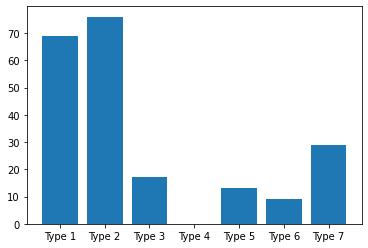

In [29]:
#3 Оценить сбалансированность
groups_names = ["Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6", "Type 7"]
Type1 = glass_df[glass_df["Type"] == 1].value_counts().sum()
Type2 = glass_df[glass_df["Type"] == 2].value_counts().sum()
Type3 = glass_df[glass_df["Type"] == 3].value_counts().sum()
Type4 = glass_df[glass_df["Type"] == 4].value_counts().sum()
Type5 = glass_df[glass_df["Type"] == 5].value_counts().sum()
Type6 = glass_df[glass_df["Type"] == 6].value_counts().sum()
Type7 = glass_df[glass_df["Type"] == 7].value_counts().sum()
plt.bar(groups_names,[Type1,Type2,Type3,Type4,Type5,Type6,Type7])


In [30]:
#5 Замена категориальных признаков
#arameters = glass_df.drop(columns='Type')
#or i in glass_df['Type'].unique():
#   glass_df['Type' + '=' + str(i)] = (glass_df['Type'] == i).astype(int)
#lass_df.pop('Type')
#lass_df

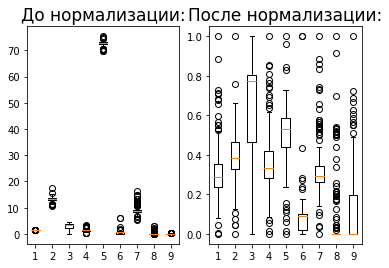

In [31]:
#4 Масштабирование
Type = glass_df['Type']
glass_df.drop(columns='Type', inplace=True)

plt.subplot(1, 2, 1);
plt.title('До нормализации:', fontsize=17)
plt.boxplot(glass_df);

glass_df = (glass_df - glass_df.min())/(glass_df.max() - glass_df.min());#(X-Xmin)/(Xmax-Xmin)

plt.subplot(1, 2, 2);
plt.title('После нормализации:', fontsize=17)
plt.boxplot(glass_df);
glass_df['Type'] = Type

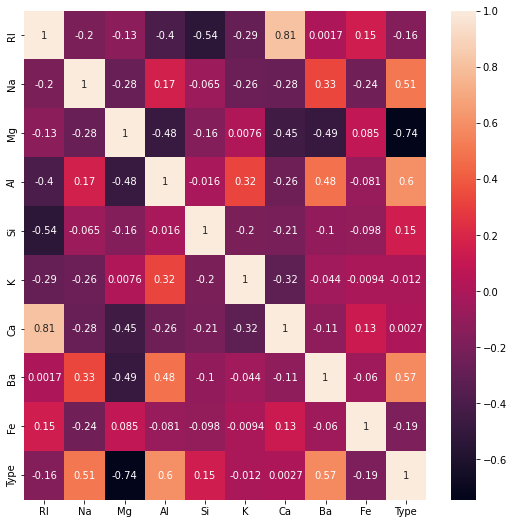

In [32]:
#6 Оценить кореляцию
plt.figure(figsize=(9, 9));

corr = glass_df.corr();

sb.heatmap(corr, annot=True);

In [33]:
#8 Метод K ближайших соседей
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

x = glass_df.drop('Type', axis=1)
y = glass_df['Type']

Y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6, 7]) #Делаем бинаризацию классов(Приводим классы к виду [0,0,1,0,0,0,0] - 3 Класс // [1,0,0,0,0,0,0] - 1 Класс)
n_classes = Y.shape[1] #Получаем количество классов

x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size=0.3) #Делим данные на обучаущие и тестовые
  
classificator = KNeighborsClassifier() #Указываем классификатор(К ближайших соседей)
parametrs = {'n_neighbors': range(1,30,1)}; #Задаем количество соседей в виде range для подбора лучшего через поиск по сетке

grid = GridSearchCV(classificator, parametrs, cv=10)#Задаем количество блоков для перекрестной проверки и параметры для поиска по сетке
grid.fit(x_train, y_train)#Обучаем алгоритм
grid.best_params_#Выводим лучшие параметры

{'n_neighbors': 1}

In [34]:
grid.predict(x_test) #Делаем прогноз на тестовых данных и выводим результат

array([[0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0,

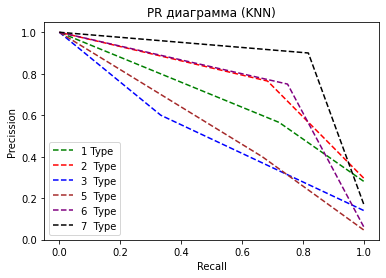

In [35]:
#PR
from sklearn.metrics import precision_recall_curve

y_score = grid.predict_proba(x_test) #Делаем прогноз в виде вероятностей

precision = {}
recall = {}

for i in range(n_classes):
    if i == 3: continue; #В моих данных 7 Классов но отсутствуют хоть какие-то данные с 4 Классом поэтому класс 4 не будет иметь вероятностей для построения диаграммы
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i], y_score[i][:,1]) #Для каждого класса рассчитываем precission и recall

plt.plot(recall[0], precision[0], linestyle='--',color='green', label='1 Type') #Выводим график класса 1
plt.plot(recall[1], precision[1], linestyle='--',color='red', label='2  Type') #Выводим график класса 2
plt.plot(recall[2], precision[2], linestyle='--',color='blue', label='3  Type') #Выводим график класса 3
plt.plot(recall[4], precision[4], linestyle='--',color='brown', label='5  Type') #Выводим график класса 5
plt.plot(recall[5], precision[5], linestyle='--',color='purple', label='6  Type') #Выводим график класса 6
plt.plot(recall[6], precision[6], linestyle='--',color='black', label='7  Type') #Выводим график класса 7

plt.title('PR диаграмма (KNN)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='lower left')

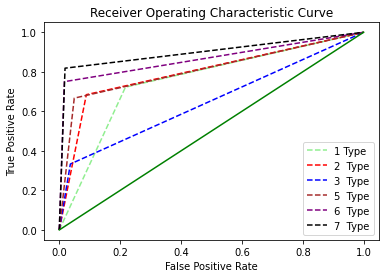

In [36]:
#ROC
from sklearn.metrics import roc_curve

fpr = {}
tpr = {}

for i in range(n_classes):
    if i == 3: continue; #В моих данных отсутствует имеется 7 Классов но отсутствуют хоть какие-то данные с 4 Классом поэтому данный класс не будет иметь вероятностей для построения диаграммы
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[i][:,1]) #Для каждого класса рассчитываем False-Positive rate и True-Positive rate


plt.plot(fpr[0], tpr[0], linestyle='--',color='lightgreen', label='1 Type')#Выводим график класса 1
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='2  Type')#Выводим график класса 2
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='3  Type')#Выводим график класса 3
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label='5  Type')#Выводим график класса 5
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='6  Type')#Выводим график класса 6
plt.plot(fpr[6], tpr[6], linestyle='--',color='black', label='7  Type')#Выводим график класса 7
    
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
#9 логический классификатор (бинарное решающее дерево).
from sklearn import tree
classificator = tree.DecisionTreeClassifier() #Указываем классификатор
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(3,30,1)}; #Указываем параметры для подбора лучшего через поиск по сетке
#criterion критерий ветвления
#Он используется для оценки важности функции. Основываясь на нем, модель определит важность каждого признака для классификации.
#max_depth
#Максимальная глубина деревыа решений

grid = GridSearchCV(classificator, parametrs, cv=10)#Задаем количество блоков для перекрестной проверки и параметры для поиска по сетке
grid.fit(x_train, y_train)#Обучаем алгоритм
grid.best_params_#Выводим лучшие параметры

{'criterion': 'entropy', 'max_depth': 9}

In [38]:
grid.predict(x_test) #Делаем прогноз на тестовых данных и выводим результат

array([[0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0,

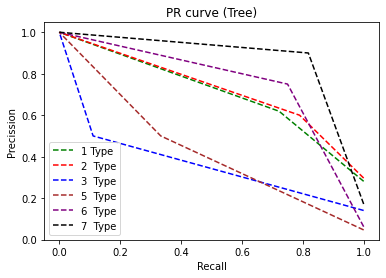

In [39]:
#PR
y_score = grid.predict_proba(x_test) #Делаем прогноз в виде вероятностей

precision = {}
recall = {}

for i in range(n_classes):
    if i == 3: continue; #В моих данных отсутствует имеется 7 Классов но отсутствуют хоть какие-то данные с 4 Классом поэтому данный класс не будет иметь вероятностей для построения диаграммы
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i], y_score[i][:,1]) #Для каждого класса рассчитываем precission и recall

plt.plot(recall[0], precision[0], linestyle='--',color='green', label='1 Type')#Выводим график класса 1
plt.plot(recall[1], precision[1], linestyle='--',color='red', label='2  Type')#Выводим график класса 2
plt.plot(recall[2], precision[2], linestyle='--',color='blue', label='3  Type')#Выводим график класса 3
plt.plot(recall[4], precision[4], linestyle='--',color='brown', label='5  Type')#Выводим график класса 5
plt.plot(recall[5], precision[5], linestyle='--',color='purple', label='6  Type')#Выводим график класса 6
plt.plot(recall[6], precision[6], linestyle='--',color='black', label='7  Type')#Выводим график класса 7

plt.title('PR curve (Tree)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='lower left')

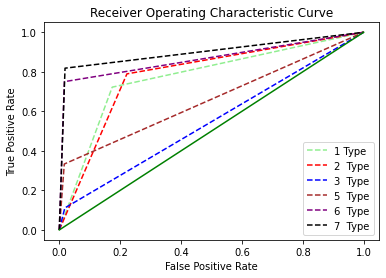

In [40]:
#ROC
from sklearn.metrics import roc_curve

fpr = {}
tpr = {}

for i in range(n_classes):
    if i == 3: continue; #В моих данных отсутствует имеется 7 Классов но отсутствуют хоть какие-то данные с 4 Классом поэтому данный класс не будет иметь вероятностей для построения диаграммы
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[i][:,1]) #Для каждого класса рассчитываем False-Positive rate и True-Positive rate


plt.plot(fpr[0], tpr[0], linestyle='--',color='lightgreen', label='1 Type')#Выводим график класса 1
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='2  Type')#Выводим график класса 2
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='3  Type')#Выводим график класса 3
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label='5  Type')#Выводим график класса 5
plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='6  Type')#Выводим график класса 6
plt.plot(fpr[6], tpr[6], linestyle='--',color='black', label='7  Type')#Выводим график класса 7
    
plt.plot([0, 1], [0, 1], color='green', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()